This notebook is used for generating examples mentioned in my thesis.

In [1]:
from nltk.tokenize import word_tokenize

sentence = "We're going shopping today, but yesterday we went to the "
"cinema because shops were closed."
tokens = word_tokenize(sentence.lower())
print(tokens)

['we', "'re", 'going', 'shopping', 'today', ',', 'but', 'yesterday', 'we', 'went', 'to', 'the']


In [2]:
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer(language='english')
stem_tokens = [stemmer.stem(token) for token in tokens]
print(stem_tokens)

['we', 're', 'go', 'shop', 'today', ',', 'but', 'yesterday', 'we', 'went', 'to', 'the']


In [3]:
from collections import Counter

bag_of_words = Counter(tokens)
print(bag_of_words)
bag_of_words_stem = Counter(stem_tokens)
print(bag_of_words_stem)

Counter({'we': 2, "'re": 1, 'going': 1, 'shopping': 1, 'today': 1, ',': 1, 'but': 1, 'yesterday': 1, 'went': 1, 'to': 1, 'the': 1})
Counter({'we': 2, 're': 1, 'go': 1, 'shop': 1, 'today': 1, ',': 1, 'but': 1, 'yesterday': 1, 'went': 1, 'to': 1, 'the': 1})


In [4]:
from torchtext.vocab import Vocab

vocab = Vocab(bag_of_words, max_size=15, specials=['<unk>'])
word_vector = [vocab.stoi[token] for token in tokens]
print(word_vector)

[1, 2, 5, 6, 9, 3, 4, 11, 1, 10, 8, 7]


In [5]:
import gensim.downloader

glove = gensim.downloader.load('glove-wiki-gigaword-50')

In [6]:
import numpy as np

sample_words = ['king', 'science', 'computer']
vectors = []
labels = []
for sample_word in sample_words:
    vectors.append(glove[sample_word])
    labels.append(sample_word)
    similar_words = glove.most_similar(sample_word, topn=10)
    for word, _ in similar_words:
        vectors.append(glove[word])
        labels.append(word)

vectors = np.asarray(vectors)
vectors.shape

(33, 50)

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_vectors = pca.fit_transform(vectors)
pca_vectors.shape

(33, 2)

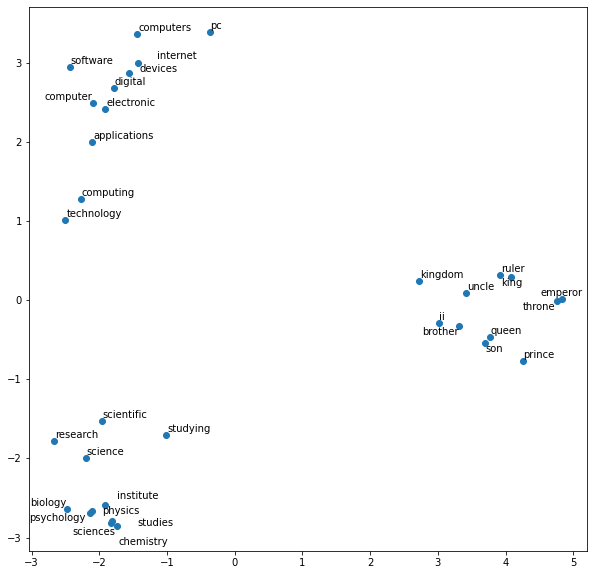

In [8]:
import matplotlib.pyplot as plt
from adjustText import adjust_text

plt.figure(figsize=(10, 10))
plt.scatter(pca_vectors[:, 0], pca_vectors[:, 1])
annotations = []
for i, label in enumerate(labels):
    annotations.append(plt.annotate(label, (pca_vectors[i, 0], pca_vectors[i, 1])))
adjust_text(annotations)
plt.show()